<a href="https://colab.research.google.com/github/BERLINx03/SWE-2_PROJECT/blob/main/Copy_of_student_performance_on_quizzes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/assistments_2009_2010.csv')
df.head()
df=df.sample(frac=0.2,random_state=101)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

df.info()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,202216.0,2.948530e+07,5.330974e+06,20224123.0,25000786.50,29532952.5,33568471.50,38310281.0
assignment_id,202216.0,2.723541e+05,1.025803e+04,174100.0,266439.00,271019.0,278123.00,291504.0
user_id,202216.0,8.233406e+04,6.790524e+03,21825.0,78809.75,79777.0,84882.00,96299.0
assistment_id,202216.0,4.320156e+04,2.033355e+04,5.0,29579.00,43949.0,53700.00,96223.0
problem_id,202216.0,7.533713e+04,4.144563e+04,1.0,42411.00,80538.0,93826.00,182111.0
original,202216.0,7.930282e-01,4.051361e-01,0.0,1.00,1.0,1.00,1.0
correct,202216.0,6.284654e-01,4.830487e-01,0.0,0.00,1.0,1.00,1.0
attempt_count,202216.0,1.432547e+00,4.385271e+00,0.0,1.00,1.0,1.00,603.0
ms_first_response_time,202198.0,5.016890e+04,6.374261e+05,-800125.0,7294.00,17551.0,43510.75,173301028.0
sequence_id,200038.0,7.426818e+03,1.984178e+03,2246.0,5970.00,7023.0,9143.00,12367.0


In [ ]:
df.isnull().sum()

,0
order_id,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,18
tutor_mode,0


In [ ]:
df=df.drop('order_id',axis=1)

<Axes: xlabel='correct', ylabel='count'>

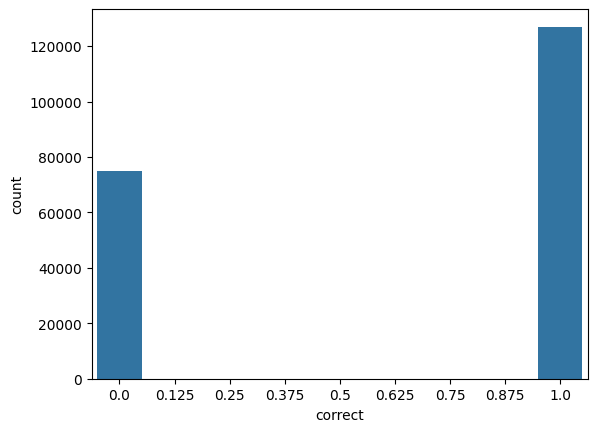

In [ ]:
sns.countplot(x='correct',data=df)

In [ ]:
num_df=df.select_dtypes(include=['number'])

In [ ]:
corr_mat=num_df.corr()

In [ ]:
corr_mat['correct'].sort_values()

,correct
attempt_count,-0.128494
ms_first_response_time,-0.004574
user_id,0.001562
teacher_id,0.036811
school_id,0.039374
student_class_id,0.043246
base_sequence_id,0.052929
assignment_id,0.056604
position,0.057420
sequence_id,0.057958


In [ ]:
df['tutor_mode'].value_counts()

,count
tutor_mode,
tutor,166527
test,30569
pre,4221
post,837
survey,62


In [ ]:
len(df['tutor_mode'])

202216

<Axes: xlabel='tutor_mode', ylabel='count'>

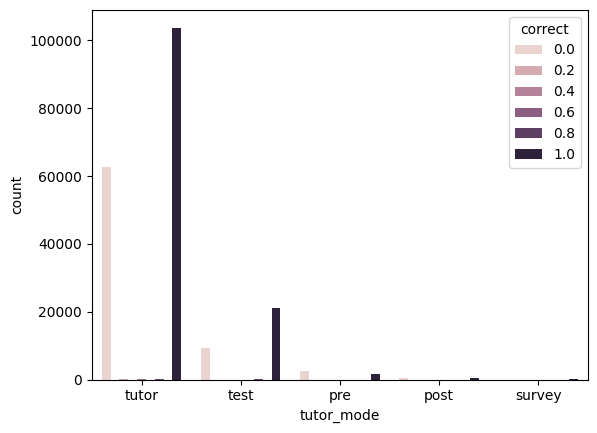

In [ ]:
sns.countplot(x='tutor_mode',hue='correct',data=df)

In [ ]:
df['list_skill_ids'].isnull().sum()

115594

In [ ]:
df['tutor_mode']=df['tutor_mode'].replace(['survey','post','pre'],'OTHER')

In [ ]:
df['tutor_mode'].value_counts()

,count
tutor_mode,
tutor,166527
test,30569
OTHER,5120


<Axes: xlabel='answer_type', ylabel='count'>

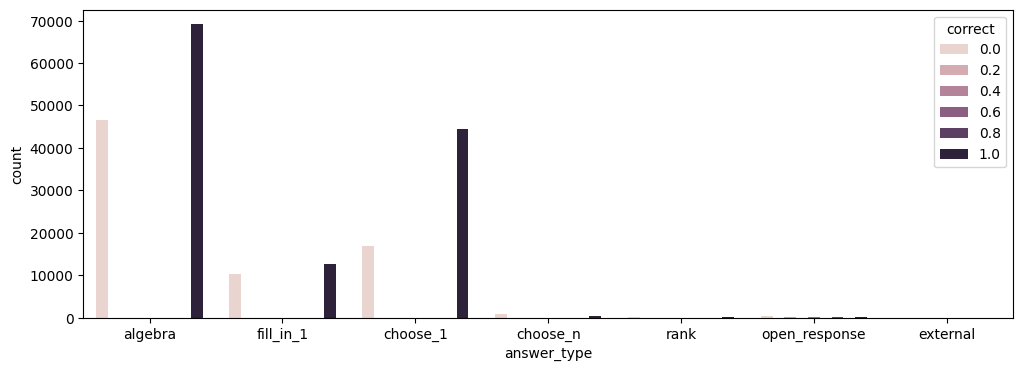

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='answer_type',hue='correct',data=df)

In [ ]:
answer_counts=df.groupby(['answer_type','correct']).size().unstack(fill_value=0)

In [ ]:
answer_counts['correct_percentage'] = (answer_counts[1] / answer_counts.sum(axis=1)) * 100
answer_counts['incorrect_percentage'] = (answer_counts[0] / answer_counts.sum(axis=1)) * 100

In [ ]:
answer_counts.head()

correct,0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,correct_percentage,incorrect_percentage
answer_type,,,,,,,,,,,
algebra,46539,0,0,0,1,0,1,0,69147,59.770244,40.207254
choose_1,16975,0,0,0,0,0,0,0,44460,72.369171,27.598319
choose_n,829,0,0,0,0,0,0,0,306,26.960352,71.344947
external,5,0,0,0,0,0,0,0,2,28.571429,14.056225
fill_in_1,10274,0,0,0,0,0,0,0,12706,55.291558,44.601129


In [ ]:
# plt.figure(figsize=(12,4))
# sns.barplot(x='correct_percentage',y='incorrect_percentage',data=answer_counts)


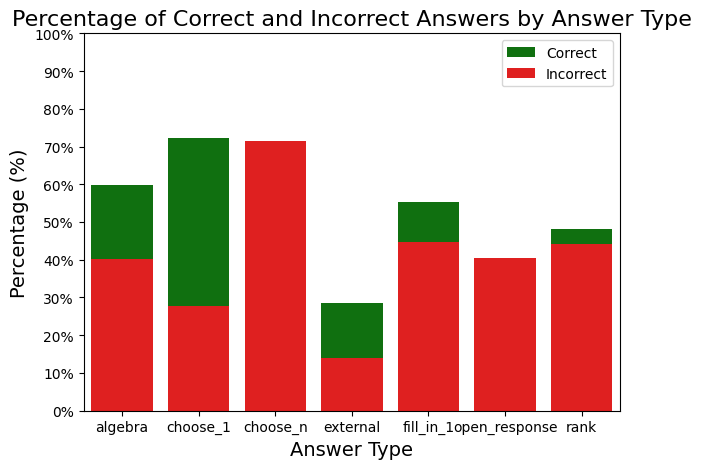

In [ ]:
sns.barplot(x='answer_type', y='correct_percentage', data=answer_counts, color='green', label='Correct')
sns.barplot(x='answer_type', y='incorrect_percentage', data=answer_counts, color='red', label='Incorrect')

# Customize the plot
plt.title('Percentage of Correct and Incorrect Answers by Answer Type', fontsize=16)
plt.xlabel('Answer Type', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

# Set y-ticks manually to avoid decimals
plt.yticks(ticks=range(0, 101, 10), labels=[f'{i}%' for i in range(0, 101, 10)])

# Set limits for the y-axis
plt.ylim(0, 100)

# Adjust legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

<Axes: xlabel='attempt_count', ylabel='correct'>

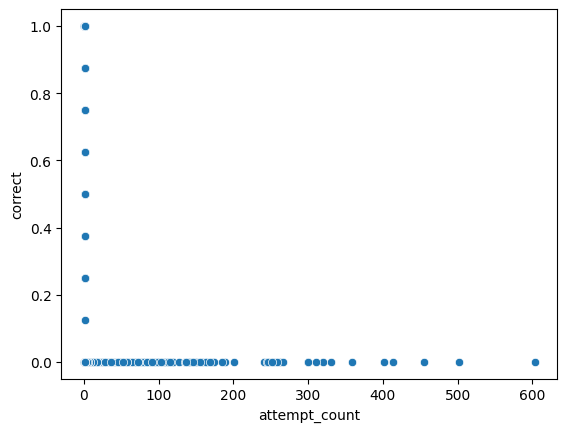

In [ ]:
sns.scatterplot(x='attempt_count',y='correct',data=df)

In [ ]:
df['attempt_count'].value_counts()

,count
attempt_count,
1,167019
2,16173
3,6451
0,4464
4,3531
...,...
127,1
246,1
94,1


In [ ]:
df['ms_first_response_time'].isnull().sum()

18

In [ ]:
df.dropna(subset=['ms_first_response_time'], inplace=True)
df = df.dropna(subset=['ms_first_response_time'])


In [ ]:
df.isnull().sum()

,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,0
tutor_mode,0
answer_type,0


In [ ]:
11006 *5/ len(df)

0.2721589728879613

In [ ]:
len(df)

202198

In [ ]:
# df = df.drop('list_skills',axis=1)

In [ ]:
len(df)

202198

In [ ]:
df.isnull().sum()

,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,0
tutor_mode,0
answer_type,0


<Axes: xlabel='list_skill_ids', ylabel='list_skills'>

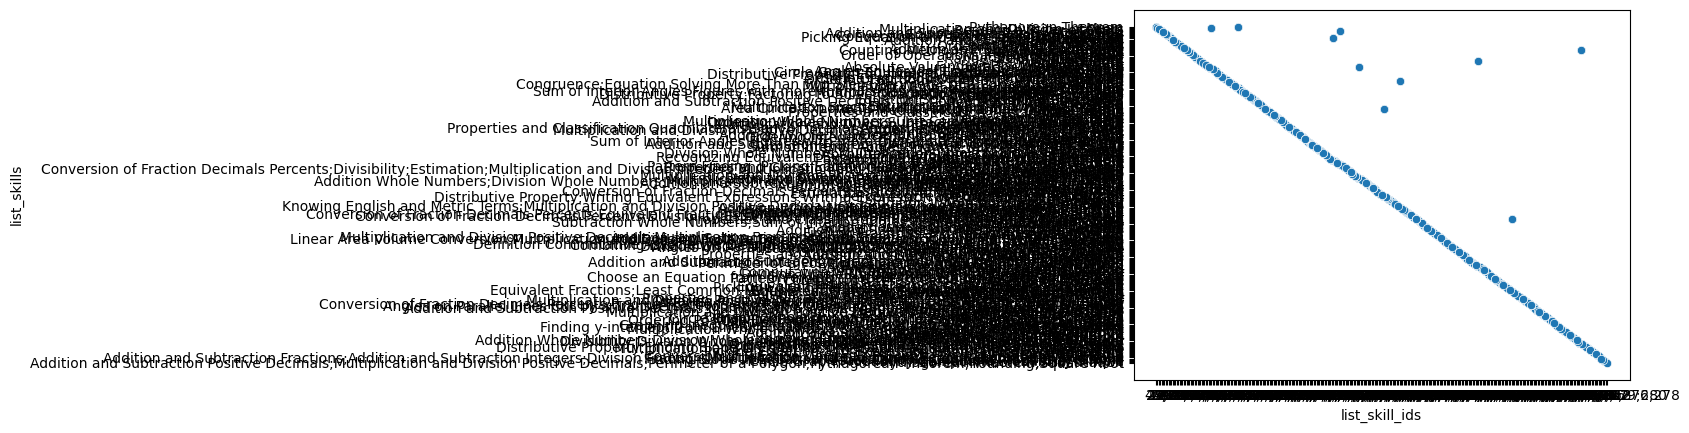

In [ ]:
sns.scatterplot(x='list_skill_ids',y='list_skills',data=df)

In [ ]:
df=df.drop('list_skills',axis=1)

<Axes: xlabel='sequence_id', ylabel='base_sequence_id'>

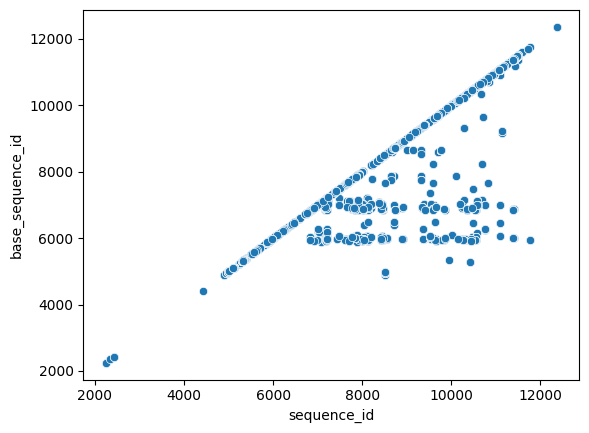

In [ ]:
sns.scatterplot(x='sequence_id',y='base_sequence_id',data=df)

In [ ]:
df.isnull().sum()

,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,0
tutor_mode,0
answer_type,0


In [ ]:
df['base_sequence_id'].value_counts()

,count
base_sequence_id,
2427.0,3502
8701.0,3317
5110.0,3008
6094.0,2509
5330.0,2470
...,...
9223.0,1
9804.0,1
6317.0,1


In [ ]:
df['sequence_id'].value_counts()

,count
sequence_id,
2427.0,3502
5110.0,3008
5330.0,2470
5969.0,2054
8743.0,1987
...,...
9944.0,1
8122.0,1
6317.0,1


In [ ]:
# df.dropna(subset=['base_sequence_id'],inplace=True)

In [ ]:
df.isnull().sum()

,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,0
tutor_mode,0
answer_type,0


In [ ]:
df['sequence_id'] = df[['base_sequence_id', 'sequence_id']].apply(lambda x: x.dropna().unique(), axis=1)

In [ ]:
df.isnull().sum()

,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,0
tutor_mode,0
answer_type,0


In [ ]:
# df['problem_set_type'].value_counts()
df['position'].value_counts()

,count
position,
1.0,39449
2.0,11149
6.0,6994
3.0,6194
4.0,5788
...,...
276.0,3
273.0,3
274.0,3


In [ ]:
df=df.drop('base_sequence_id',axis=1)

In [ ]:
df['position']=df['position'].fillna(1)

In [ ]:
df.isnull().sum()

,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,0
tutor_mode,0
answer_type,0


In [ ]:
df['school_id'].value_counts()

,count
school_id,
2770.0,56836
5056.0,29265
5794.0,23005
73.0,19098
76.0,17339
...,...
5523.0,1
5440.0,1
4958.0,1


In [ ]:
# Find the three most frequent values in column 'A'
top_values = df['school_id'].value_counts().nlargest(3).index.tolist()

# Fill missing values with the most frequent values
for i, value in enumerate(top_values):
    df['school_id'] = df['school_id'].fillna(value) if i < len(top_values) else df['school_id']

df['school_id'].value_counts()

,count
school_id,
2770.0,62649
5056.0,29265
5794.0,23005
73.0,19098
76.0,17339
...,...
5523.0,1
5440.0,1
4958.0,1


In [ ]:
df.isnull().sum()

,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,0
tutor_mode,0
answer_type,0


In [ ]:
df['problem_set_type'].value_counts()

,count
problem_set_type,
LinearSection,86054
MasterySection,85214
RandomChildOrderSection,28752


In [ ]:
top_values = df['problem_set_type'].value_counts().index.tolist()

# Function to fill NaN values with top values cycling through
def fill_with_top_values(value):
    if pd.isna(value):
        return top_values[0]  # You can change this to the method of your choice
    return value

# Fill missing values directly in the 'problem_set_type' column using apply
df['problem_set_type'] = df['problem_set_type'].apply(fill_with_top_values)


In [ ]:
df.isnull().sum()

,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,0
tutor_mode,0
answer_type,0


In [ ]:
df['problem_set_type'].value_counts()

,count
problem_set_type,
LinearSection,88232
MasterySection,85214
RandomChildOrderSection,28752


<Axes: xlabel='student_class_id', ylabel='teacher_id'>

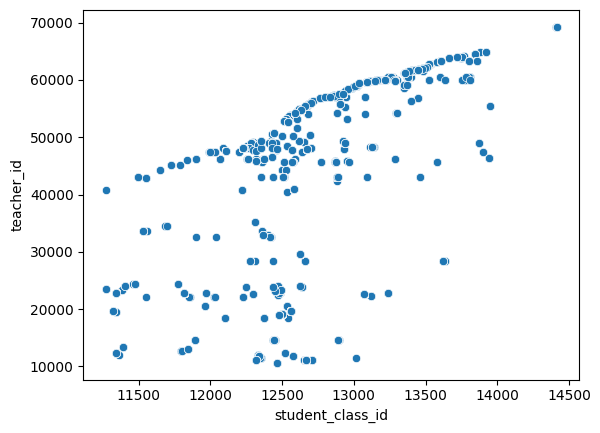

In [ ]:
sns.scatterplot(x='student_class_id',y='teacher_id',data=df)

In [ ]:
# df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
assignment_id,0
user_id,0
assistment_id,0
problem_id,0
original,0
correct,0
attempt_count,0
ms_first_response_time,0
tutor_mode,0
answer_type,0


In [ ]:
df.select_dtypes('object').columns

Index(['tutor_mode', 'answer_type', 'sequence_id', 'problem_set_type',
       'list_skill_ids'],
      dtype='object')

In [ ]:
# cat_cols=['tutor_mode', 'answer_type', 'sequence_id', 'problem_set_type',
#        'list_skill_ids']
for col in ['tutor_mode', 'answer_type', 'sequence_id', 'problem_set_type', 'list_skill_ids']:
    df[col] = df[col].astype(str)

dummies = pd.get_dummies(df[['tutor_mode', 'answer_type', 'sequence_id', 'problem_set_type',
       'list_skill_ids']],drop_first=True)
df=pd.concat([df.drop(['tutor_mode', 'answer_type', 'sequence_id', 'problem_set_type',
       'list_skill_ids'],axis=1),dummies],axis=1)

In [ ]:
df.dtypes

,0
assignment_id,int64
user_id,int64
assistment_id,int64
problem_id,int64
original,int64
...,...
list_skill_ids_9;13,bool
list_skill_ids_9;13;15,bool
list_skill_ids_9;14,bool
list_skill_ids_9;15,bool


In [ ]:
X=df.drop('correct',axis=1).values
y=df['correct'].values
from sklearn.model_selection import train_test_split

In [ ]:
y=y.astype(int)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_estimators=200,max_depth=None,min_samples_leaf=1,min_samples_split=2)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
preds=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79     14945
           1       0.86      0.91      0.88     25495

    accuracy                           0.85     40440
   macro avg       0.84      0.83      0.84     40440
weighted avg       0.85      0.85      0.85     40440



In [ ]:
import joblib
joblib.dump(model, 'my_random_forest_model_quizclassificaton.pkl')  # Save the model
from google.colab import files

files.download('my_random_forest_model_quizclassificaton.pkl')  # Download the model



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
model_2 =HistGradientBoostingClassifier(
    learning_rate=0.08,      # Moderate learning rate
    max_iter=200,            # More boosting iterations
    max_depth=100,            # Moderate depth to prevent overfitting
    min_samples_leaf=20,     # Requires more samples at the leaves
    max_bins=255,            # High number of bins for better detail
    l2_regularization=0.1,   # Regularization to avoid overfitting
    random_state=42          # For reproducibility
)

In [ ]:
model_2.fit(X_train,y_train)

In [ ]:
hist_preds=model_2.predict(X_test)
print(classification_report(y_test,hist_preds))

              precision    recall  f1-score   support

           0       0.93      0.61      0.74     14945
           1       0.81      0.97      0.88     25495

    accuracy                           0.84     40440
   macro avg       0.87      0.79      0.81     40440
weighted avg       0.85      0.84      0.83     40440



In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the scaler
# scaler = MinMaxScaler()

# # Fit and transform the training data, and transform the test data
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train.shape

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dropout,Dense
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# nn = Sequential()
# nn.add(Dense(1847,activation='relu'))
# nn.add(Dropout(0.2))

# nn.add(Dense(925,activation='relu'))
# nn.add(Dropout(0.2))

# nn.add(Dense(460,activation='relu'))
# nn.add(Dropout(0.2))


# nn.add(Dense(230,activation='relu'))
# nn.add(Dropout(0.2))


# nn.add(Dense(1,activation='sigmoid'))

# from tensorflow.keras.optimizers import Adam
# nn.compile(loss='binary_crossentropy', optimizer='Adam')

In [ ]:

# # import numpy as np

# # X_train = np.array(X_train, dtype=np.float32)
# # y_train = np.array(y_train, dtype=np.float32)
# # X_test = np.array(X_test, dtype=np.float32)
# # y_test = np.array(y_test, dtype=np.float32)
# early_stop = EarlyStopping(monitor='val_loss', patience=3)

# nn.fit(x=X_train_scaled, y=y_train, epochs=20, batch_size=512, validation_data=(X_test_scaled, y_test), callbacks=[early_stop])


In [ ]:
# losses=pd.DataFrame(nn.history.history)

In [ ]:
# losses.plot()

In [ ]:
# from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
# preds=(nn.predict(X_test_scaled) > 0.5).astype('int32')


In [ ]:
# print(classification_report(y_test,preds))

In [ ]:
1919/2